# Dev: Catalog for PSF Studies

Here I intend to make a catalog of the Auxtel imaging survey of single exposures. The data is from the latest processed data made by Huan Lin.

More info:
https://confluence.lsstcorp.org/pages/viewpage.action?spaceKey=LSSTCOM&title=AuxTel+Imaging+Survey+Data+Descriptions



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, join

In [2]:
%matplotlib inline


In [3]:
from datetime import date
date = date.today().strftime("%d%m%Y")
print(f'Today is: {date}')

Today is: 01042024


## Butler Acess

Before querying the data we should understand what is inside the collection.

In [4]:
import lsst.daf.butler as dafButler
 
collections=['LATISS/runs/AUXTEL_DRP_IMAGING_20230509_20240201/w_2024_05/PREOPS-4871']
 
butler = dafButler.Butler('/repo/embargo',collections=collections)
registry = butler.registry

In [30]:
help(registry.queryDatasetTypes)

Help on method queryDatasetTypes in module lsst.daf.butler._registry_shim:

queryDatasetTypes(expression: 'Any' = Ellipsis, *, components: 'bool | _Marker' = <lsst.daf.butler.utils._Marker object at 0x7f605b0fa190>, missing: 'list[str] | None' = None) -> 'Iterable[DatasetType]' method of lsst.daf.butler._registry_shim.RegistryShim instance
    Iterate over the dataset types whose names match an expression.
    
    Parameters
    ----------
    expression : dataset type expression, optional
        An expression that fully or partially identifies the dataset types
        to return, such as a `str`, `re.Pattern`, or iterable thereof.
        ``...`` can be used to return all dataset types, and is the
        default. See :ref:`daf_butler_dataset_type_expressions` for more
        information.
    components : `bool`, optional
        Must be `False`.  Provided only for backwards compatibility. After
        v27 this argument will be removed entirely.
    missing : `list` of `str`, opti

In [37]:
for dtp in registry.queryDatasetTypes():
    if 'src' in dtp.name:
        print(dtp)

DatasetType('src_schema', {}, SourceCatalog)
DatasetType('src', {band, instrument, detector, physical_filter, visit}, SourceCatalog)
DatasetType('srcMatchFull', {band, instrument, detector, physical_filter, visit}, Catalog)
DatasetType('srcMatch', {band, instrument, detector, physical_filter, visit}, Catalog)
DatasetType('finalized_src_table', {band, instrument, physical_filter, visit}, DataFrame)
DatasetType('deepCoadd_forced_src_schema', {}, SourceCatalog)
DatasetType('deepCoadd_forced_src', {band, skymap, tract, patch}, SourceCatalog)
DatasetType('forced_src_schema', {}, SourceCatalog)
DatasetType('forced_src', {band, instrument, skymap, detector, physical_filter, tract, visit}, SourceCatalog)
DatasetType('forced_src_diaObject', {band, instrument, skymap, detector, physical_filter, tract, visit}, SourceCatalog)
DatasetType('forced_src_diaObject_schema', {}, SourceCatalog)


In [65]:
scr = butler.get('srcMatchFull', visit=expIds[0], detector=0, collections=collections[0]).asAstropy()
scr

ref_id,ref_coord_ra,ref_coord_dec,ref_phot_g_mean_flux,ref_anyFilterMapsToThis,ref_phot_bp_mean_flux,ref_phot_rp_mean_flux,ref_phot_g_mean_fluxErr,ref_anyFilterMapsToThisErr,ref_phot_bp_mean_fluxErr,ref_phot_rp_mean_fluxErr,ref_coord_raErr,ref_coord_decErr,ref_epoch,ref_pm_ra,ref_pm_dec,ref_pm_raErr,ref_pm_decErr,ref_pm_flag,ref_parallax,ref_parallaxErr,ref_parallax_flag,ref_coord_ra_coord_dec_Cov,ref_coord_ra_pm_ra_Cov,ref_coord_ra_pm_dec_Cov,ref_coord_ra_parallax_Cov,ref_coord_dec_pm_ra_Cov,ref_coord_dec_pm_dec_Cov,ref_coord_dec_parallax_Cov,ref_pm_ra_pm_dec_Cov,ref_pm_ra_parallax_Cov,ref_pm_dec_parallax_Cov,ref_astrometric_excess_noise,ref_centroid_x,ref_slot_Centroid_x,ref_centroid_y,ref_slot_Centroid_y,ref_hasCentroid,src_id,src_coord_ra,src_coord_dec,src_parent,src_calib_detected,src_calib_psf_candidate,src_calib_psf_used,src_calib_psf_reserved,src_coord_raErr,src_coord_decErr,src_coord_ra_dec_Cov,src_deblend_nChild,src_deblend_deblendedAsPsf,src_deblend_psfCenter_x,src_deblend_psfCenter_y,src_deblend_psf_instFlux,src_deblend_tooManyPeaks,src_deblend_parentTooBig,src_deblend_masked,src_deblend_failed,src_deblend_skipped,src_deblend_rampedTemplate,src_deblend_patchedTemplate,src_deblend_hasStrayFlux,src_deblend_peak_center_x,src_deblend_peak_center_y,src_deblend_peakId,src_deblend_nPeaks,src_deblend_parentNPeaks,src_sky_source,src_base_NaiveCentroid_x,src_base_NaiveCentroid_y,src_base_NaiveCentroid_flag,src_base_NaiveCentroid_flag_noCounts,src_base_NaiveCentroid_flag_edge,src_base_NaiveCentroid_flag_resetToPeak,src_base_SdssCentroid_x,src_slot_Centroid_x,src_base_SdssCentroid_y,src_slot_Centroid_y,src_base_SdssCentroid_xErr,src_slot_Centroid_xErr,src_base_SdssCentroid_yErr,src_slot_Centroid_yErr,src_base_SdssCentroid_flag,src_base_CircularApertureFlux_flag_badCentroid,src_base_GaussianFlux_flag_badCentroid,src_base_LocalBackground_flag_badCentroid,src_base_NaiveCentroid_flag_badInitialCentroid,src_base_PsfFlux_flag_badCentroid,src_base_SdssShape_flag_badCentroid,src_base_Variance_flag_badCentroid,src_ext_photometryKron_KronFlux_flag_badInitialCentroid,src_ext_shapeHSM_HigherOrderMomentsPSF_flag_badCentroid,src_ext_shapeHSM_HsmPsfMomentsDebiased_flag_badCentroid,src_ext_shapeHSM_HsmPsfMoments_flag_badCentroid,src_ext_shapeHSM_HsmShapeRegauss_flag_badCentroid,src_ext_shapeHSM_HsmSourceMomentsRound_flag_badCentroid,src_ext_shapeHSM_HsmSourceMoments_flag_badCentroid,src_slot_Centroid_flag,src_base_SdssCentroid_flag_edge,src_base_CircularApertureFlux_flag_badCentroid_edge,src_base_GaussianFlux_flag_badCentroid_edge,src_base_LocalBackground_flag_badCentroid_edge,src_base_NaiveCentroid_flag_badInitialCentroid_edge,src_base_PsfFlux_flag_badCentroid_edge,src_base_SdssShape_flag_badCentroid_edge,src_base_Variance_flag_badCentroid_edge,src_ext_photometryKron_KronFlux_flag_badInitialCentroid_edge,src_ext_shapeHSM_HigherOrderMomentsPSF_flag_badCentroid_edge,src_ext_shapeHSM_HsmPsfMomentsDebiased_flag_badCentroid_edge,src_ext_shapeHSM_HsmPsfMoments_flag_badCentroid_edge,src_ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_edge,src_ext_shapeHSM_HsmSourceMomentsRound_flag_badCentroid_edge,src_ext_shapeHSM_HsmSourceMoments_flag_badCentroid_edge,src_slot_Centroid_flag_edge,src_base_SdssCentroid_flag_noSecondDerivative,src_base_CircularApertureFlux_flag_badCentroid_noSecondDerivative,src_base_GaussianFlux_flag_badCentroid_noSecondDerivative,src_base_LocalBackground_flag_badCentroid_noSecondDerivative,src_base_NaiveCentroid_flag_badInitialCentroid_noSecondDerivative,src_base_PsfFlux_flag_badCentroid_noSecondDerivative,src_base_SdssShape_flag_badCentroid_noSecondDerivative,src_base_Variance_flag_badCentroid_noSecondDerivative,src_ext_photometryKron_KronFlux_flag_badInitialCentroid_noSecondDerivative,src_ext_shapeHSM_HigherOrderMomentsPSF_flag_badCentroid_noSecondDerivative,src_ext_shapeHSM_HsmPsfMomentsDebiased_flag_badCentroid_noSecondDerivative,src_ext_shapeHSM_HsmPsfMoments_flag_badCentroid_noSecondDerivative,src_ext_shapeHSM_HsmShapeRegauss_

In [72]:
scr['ref_phot_g_mean_flux']

5434343.010452849
1859238.0422771932
2337614.664398612
514869.2222750477
1817259.2017511046
423940.39948645333
7794006.985936162
1121303.161690404
516893.9919394177
372572.05975043867
6086653.328699509


In [71]:
columns = list(scr.columns)
for col in columns:
    if 'ref' in col:
        print(col)

ref_id
ref_coord_ra
ref_coord_dec
ref_phot_g_mean_flux
ref_anyFilterMapsToThis
ref_phot_bp_mean_flux
ref_phot_rp_mean_flux
ref_phot_g_mean_fluxErr
ref_anyFilterMapsToThisErr
ref_phot_bp_mean_fluxErr
ref_phot_rp_mean_fluxErr
ref_coord_raErr
ref_coord_decErr
ref_epoch
ref_pm_ra
ref_pm_dec
ref_pm_raErr
ref_pm_decErr
ref_pm_flag
ref_parallax
ref_parallaxErr
ref_parallax_flag
ref_coord_ra_coord_dec_Cov
ref_coord_ra_pm_ra_Cov
ref_coord_ra_pm_dec_Cov
ref_coord_ra_parallax_Cov
ref_coord_dec_pm_ra_Cov
ref_coord_dec_pm_dec_Cov
ref_coord_dec_parallax_Cov
ref_pm_ra_pm_dec_Cov
ref_pm_ra_parallax_Cov
ref_pm_dec_parallax_Cov
ref_astrometric_excess_noise
ref_centroid_x
ref_slot_Centroid_x
ref_centroid_y
ref_slot_Centroid_y
ref_hasCentroid


In [67]:
flux = np.array(scr['base_CircularApertureFlux_3_0_instFlux'])
log_flux = np.log10(flux)

flux[np.isnan(flux)] = -1.
log_flux[np.isnan(log_flux)] = -1.

flux_gt0 = log_flux>0.
snr = scr['base_CircularApertureFlux_3_0_instFlux']/scr['base_CircularApertureFlux_3_0_instFluxErr']

KeyError: 'base_CircularApertureFlux_3_0_instFlux'

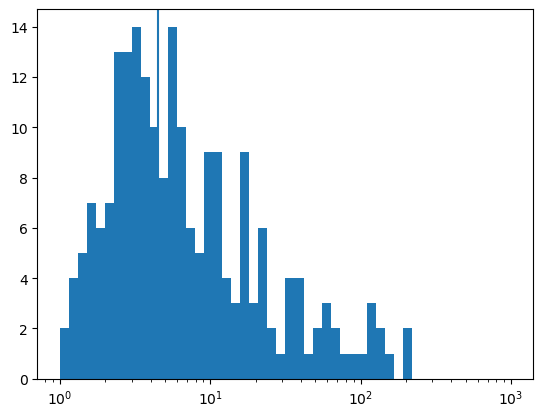

In [57]:
plt.hist(snr,bins=np.logspace(0.,3,51))
plt.axvline(4.5)
plt.xscale('log')

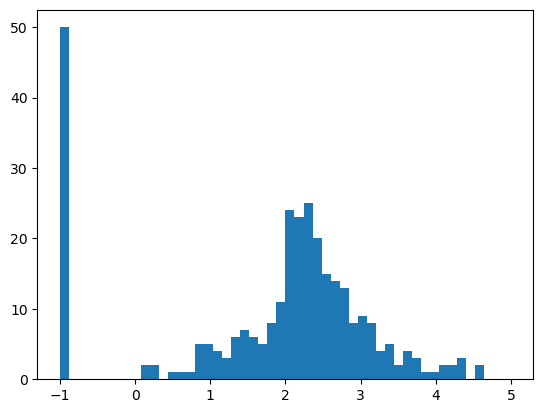

In [60]:
_ = plt.hist(log_flux,bins=np.linspace(-1,5.,51))

In [5]:
dataset_refs = list(registry.queryDatasets('calexp', collections=collections))
dataset_refs = sorted(dataset_refs, key=lambda x : x.dataId['visit'])
expIds = [int(ref.dataId['visit']) for ref in dataset_refs]

In [6]:
print(f'There are {len(expIds)} exposures')

There are 4041 exposures


In [13]:
instrument = 'LATISS'
def get_dataId(expIds):
    """
    Generates a dataId dictionary using the provided parameters.
    """
    day_obs = int(str(expIds[0])[:8])  # Convert "2023-09-21" to 20230921
    data_ids = [{'day_obs': day_obs,
                 'visit': expId,
                 'detector': 0,
                 'instrument': instrument}
                for expId in expIds]
    return data_ids

In [14]:
dataIds = get_dataId(expIds)

In [18]:
exp = butler.get('calexp', dataIds[0])

In [19]:
exp